https://thefiddler.substack.com/p/can-you-play-the-favorite

***
$\mathbf{\text{Monte Carlo Approach}}$<br>
***

In [1]:
import random
import matplotlib.pyplot as plt
from tqdm.notebook import trange

In [2]:
def fiddler_game(seed_a, seed_b): 
    seed_ls = [seed_a, seed_b]

    hi_seed = min(seed_ls)
    lo_seed = max(seed_ls)
    odds = lo_seed / sum(seed_ls) 
    
    rando = random.random()
    hi_win = odds > rando

    winner = hi_seed if hi_win else lo_seed 
    return winner

In [3]:
def fiddler_tourament():
    game_1 = fiddler_game(1, 4)
    game_2 = fiddler_game(2, 3)

    final = fiddler_game(game_1, game_2)
    return final

In [4]:
RUNS = 10**7
ledger = [0] * 5

for _ in trange(RUNS, unit_scale=True):
    champ = fiddler_tourament() 
    ledger[champ] += 1


  0%|          | 0.00/10.0M [00:00<?, ?it/s]

In [5]:
soln = ledger[1] / RUNS
print(f"1 Seed Expected Win Percentage: {soln:.1%}")

1 Seed Expected Win Percentage: 56.0%


<BarContainer object of 4 artists>

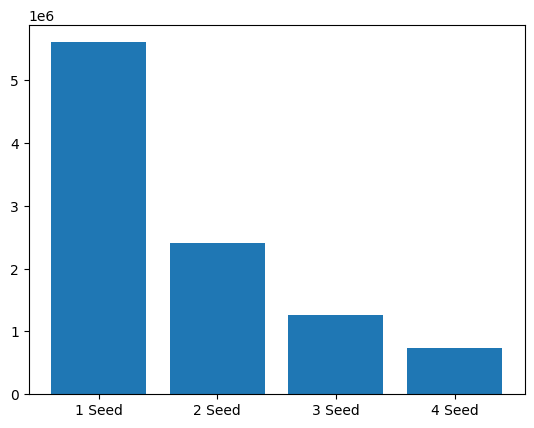

In [6]:
seed_string_1 = [str(i) for i in range(1, 5)]
seed_string_2 = " Seed"

seeds = [sd + seed_string_2 for sd in seed_string_1]

plot_values = ledger[1:]
plt.bar(seeds, plot_values)

***
$\mathbf{\text{Mathimatical Solution}}$<br>
***

__Working Backwards:__


- The odds of the 1 Seed defeating the 2 Seed are 2/3.
- The odds of the 2 Seed making the final game are 3/5. 
- So, the odds of the 1 Seed winning the final game against the 2 Seed are:
$$
\frac{2}{3} \times \frac{3}{5} = \frac{6}{15} \longrightarrow \frac{2}{5}
$$


- The odds of the 1 Seed defeating the 3 Seed are 3/4. 
- The odds of the 3 Seed making the finals are 2/5. 
- Hence the odds of the 1 Seed winning it all against the 3 Seed are:

$$
\frac{3}{4} \times \frac{2}{5} = \frac{6}{20} \longrightarrow \frac{3}{10}
$$


- The combined odds of a 1 Seed victory in the finals are:

$$
\frac{2}{5} + \frac{3}{10} = \frac{7}{10}
$$


- However, the 1 Seed isn’t guaranteed to win their initial match. 
- The chances of the 1 Seed defeating the 4 Seed are 4/5.
- Multiplying the odds of a victory in Round 1, by the odds of a victory in the finals yields:

$$
\frac{4}{5} \times \frac{7}{10} = \frac{28}{50} \longrightarrow \frac{14}{25} \leftrightarrow 56\%
$$

https://thefiddler.substack.com/p/can-you-root-for-the-underdog